<a href="https://colab.research.google.com/github/LonganPie/TinyML/blob/main/%E2%80%9CTFLite_Sine_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*斜体*
_斜体_
#第一季标题
##第二级标题
###第三级标题


- 无序列表项
* 无序列表项
+ 无序列表项

1. 有序列表项
2. 有序列表项



```python
# 这是一个Python代码块
print("Hello, World!")

#### 数学公式
使用美元符号 `$` 包围行内公式，使用 `$$` 包围块级公式。
```


```markdown
```

这是一个行内公式：$E=mc^2$

$$
\int_0^\infty e^{-x} \, dx = 1
$$


In [1]:
#!pip install tensorflow==2.0

#!pip install keras

import tensorflow as tf
import numpy as np
print(tf.__version__)
import matplotlib.pyplot as plt
import math



2.17.0


* 使用seed可以让random每次生成同样的数据，方便测试

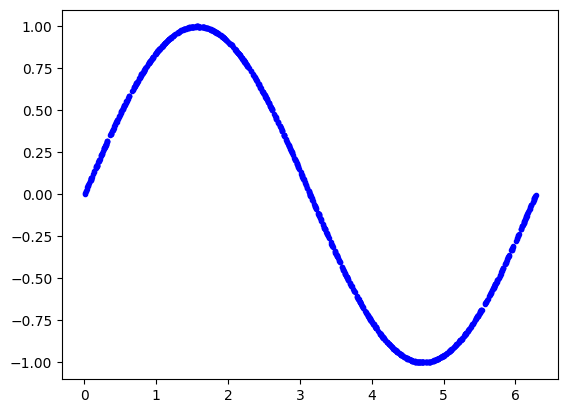

In [2]:
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
# uniform在指定的范围内生成随机数
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')

plt.show()



* 增加噪声

1000


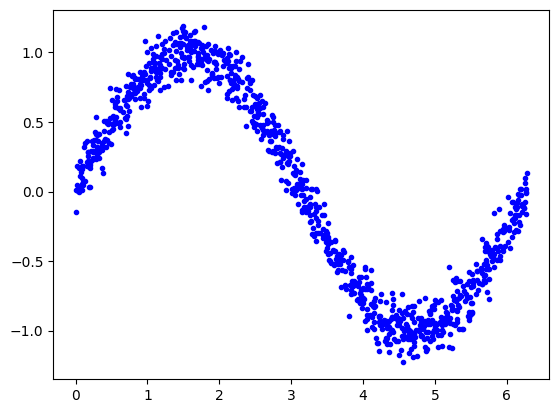

In [3]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

print(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

* 拆分数据，用以训练，验证和测试

x_train shape: (600,)  x_validate shape: (200,)  x_test shape: (200,)
TRAIN_SPLIT: 600  TEST_SPLIT: 800


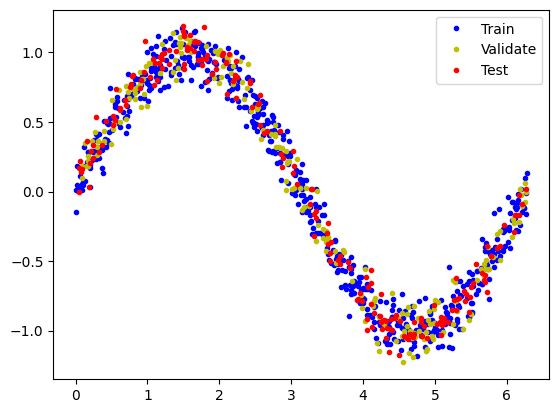

2.17.0
3.4.1


In [4]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

print("x_train shape:", x_train.shape, " x_validate shape:", x_validate.shape, " x_test shape:", x_test.shape)

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES, "数据拆分有错误"

# Plot the data in each partition in different colors:
print("TRAIN_SPLIT:", TRAIN_SPLIT, " TEST_SPLIT:", TEST_SPLIT)

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend() #增加图例
plt.show()

print(tf.__version__)
print(tf.keras.__version__)

* 运用Keras设计神经网络

Dense指的全连接层

RMSprop (Root Mean Square Propagation) 是一种常用的优化器，常用于训练神经网络。它通过对每个参数的梯度进行指数衰减的平均，来调整学习率。这种自适应学习率的方法，使得 RMSprop 能够在训练过程中自动调整学习率，从而加速收敛并提高模型的性能。

mse均方误差mean squared error函数

mae平均绝对值mean absolute error函数


In [5]:
# We'll use Keras to create a simple model architecture
#from keras import layers

#import tensorflow.keras

#from keras import Input, Dense
#from keras import Sequential

model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
#model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

model_1.add(tf.keras.layers.Input(shape=(1,)))
model_1.add(tf.keras.layers.Dense(16, activation='relu'))



# Final layer is a single neuron, since we want to output a single value
model_1.add(tf.keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()  #打印模型摘要信息

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

* 训练模型，并且用history_1收集结果

In [6]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                        validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 4.2118 - mae: 1.9036 - val_loss: 2.2327 - val_mae: 1.3826
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9247 - mae: 1.2765 - val_loss: 0.9931 - val_mae: 0.8808
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8202 - mae: 0.7825 - val_loss: 0.4230 - val_mae: 0.5241
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3609 - mae: 0.4932 - val_loss: 0.3041 - val_mae: 0.4718
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2792 - mae: 0.4591 - val_loss: 0.2816 - val_mae: 0.4548
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2580 - mae: 0.4427 - val_loss: 0.2602 - val_mae: 0.4373
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2391 - mae: 0.4279 - val_loss: 0.2419 - val_mae: 0.4221
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2232 - mae: 0.4143 - val_loss: 0.2267 - val_mae: 0.4090
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/ste

* 绘制历史数据

history_1:  <keras.src.callbacks.history.History object at 0x7edd1cba5e70>
epochs:  range(1, 1001)


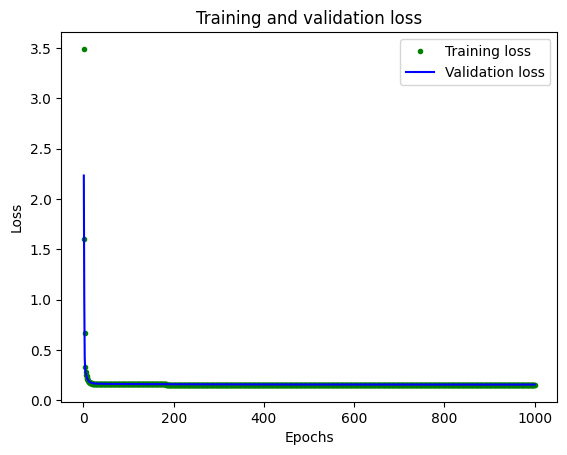

In [7]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

print("history_1: ",history_1)

epochs = range(1, len(loss) + 1)
print("epochs: ",epochs)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 跳过前100次轮次


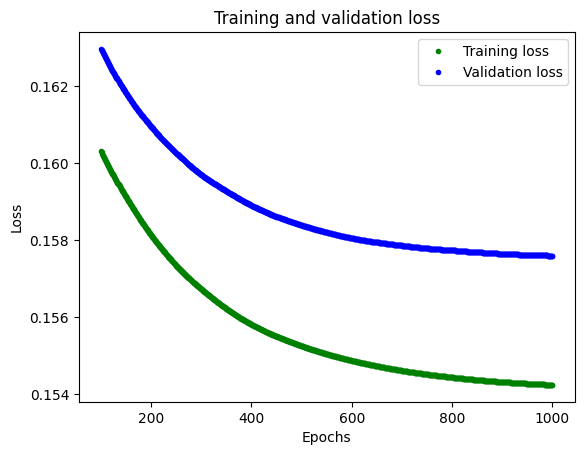

In [8]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 绘制平均绝对误差

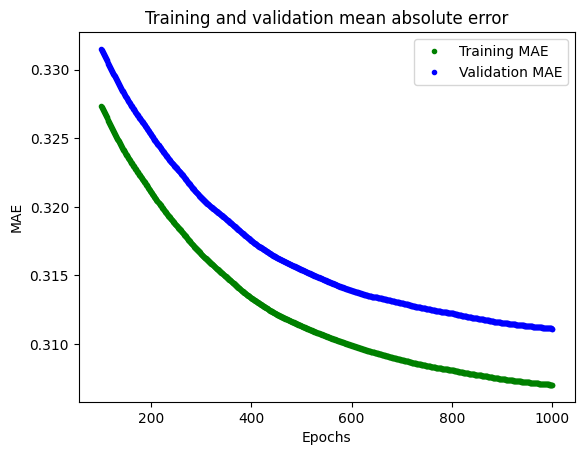

In [9]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

* 绘制网格对训练数据的预测值与期望值

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


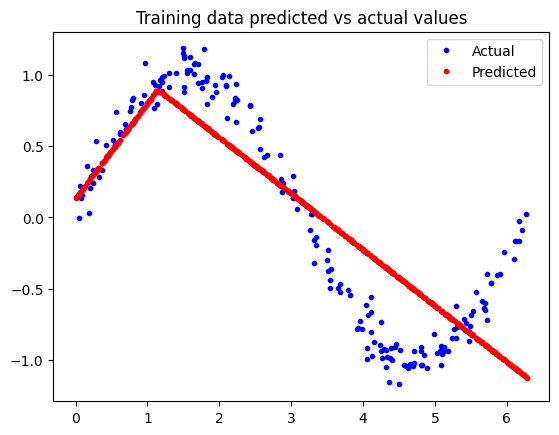

In [10]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

## 改进模型
* 两层模型效果堪忧，添加另外一层神经元，让模型加大

In [11]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
#model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_2.add(tf.keras.layers.Input(shape=(1,)))
model_2.add(tf.keras.layers.Dense(16, activation='relu'))


# The new second layer may help the network learn more complex representations
#model_2.add(layers.Dense(16, activation='relu'))
model_2.add(tf.keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
#model_2.add(layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

* 训练新模型

In [12]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4090 - mae: 0.5616 - val_loss: 0.4044 - val_mae: 0.5525
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3667 - mae: 0.5260 - val_loss: 0.3538 - val_mae: 0.5149
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3194 - mae: 0.4923 - val_loss: 0.3105 - val_mae: 0.4801
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2806 - mae: 0.4629 - val_loss: 0.2712 - val_mae: 0.4489
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2461 - mae: 0.4342 - val_loss: 0.2372 - val_mae: 0.4198
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2159 - mae: 0.4078 - val_loss: 0.2069 - val_mae: 0.3929
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1886 - mae: 0.3815 - val_loss: 0.1838 - val_mae: 0.3705
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1704 - mae: 0.3613 - val_loss: 0.1696 - val_mae: 0.3550
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.159

* 生成统计图

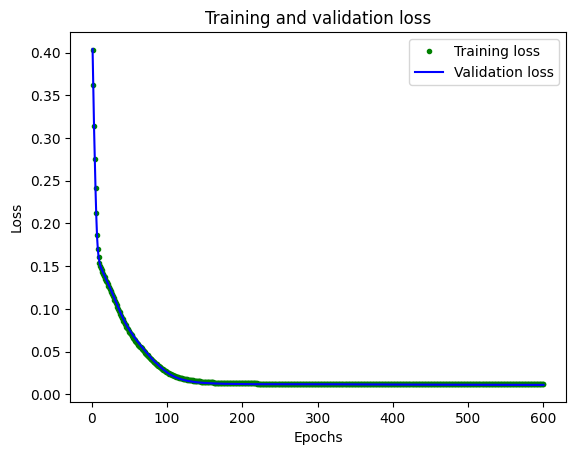

In [13]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 跳过前100轮次并绘图

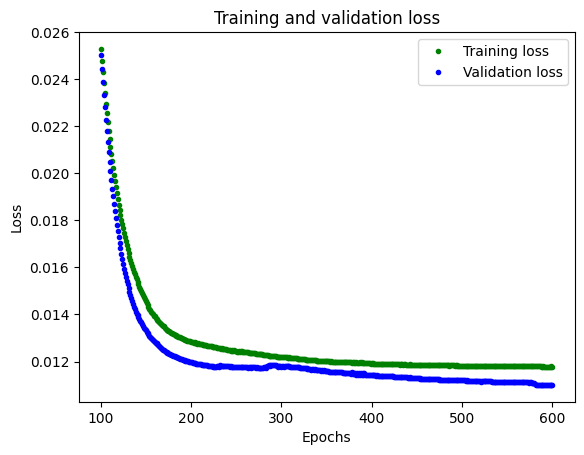

In [14]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 绘制平均绝对误差

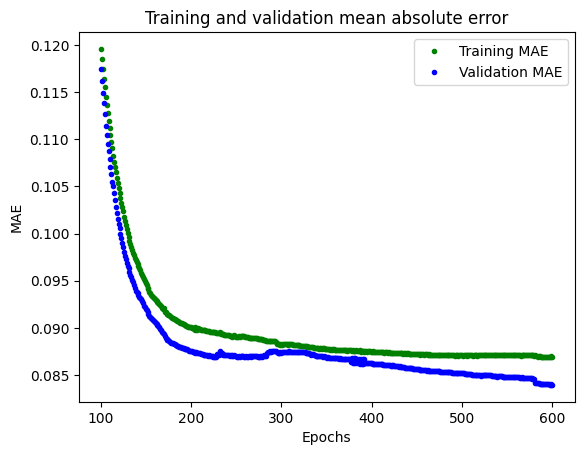

In [15]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## 测试

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 - mae: 0.0758 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


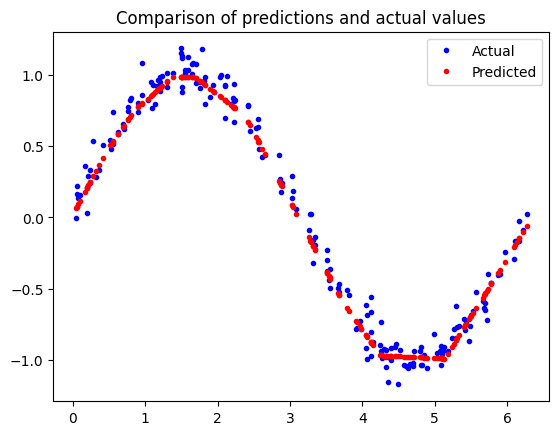

In [18]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
#print(loss)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

